# Load in Boston housing data set and train NGBoost model

In [1]:
import sys
sys.path.append("../..")

In [2]:
from ngboost import NGBRegressor

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

X, Y = load_boston(True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

ngb = NGBRegressor().fit(X_train, Y_train)
Y_preds = ngb.predict(X_test)
Y_dists = ngb.pred_dist(X_test)

# test Mean Squared Error
test_MSE = mean_squared_error(Y_preds, Y_test)
print('Test MSE', test_MSE)

# test Negative Log Likelihood
test_NLL = -Y_dists.logpdf(Y_test.flatten()).mean()
print('Test NLL', test_NLL)

[iter 0] loss=3.6346 val_loss=0.0000 scale=0.5000 norm=3.3413
[iter 100] loss=3.0660 val_loss=0.0000 scale=1.0000 norm=3.7230
[iter 200] loss=2.4173 val_loss=0.0000 scale=2.0000 norm=3.9800
[iter 300] loss=2.0061 val_loss=0.0000 scale=2.0000 norm=3.1344
[iter 400] loss=1.8193 val_loss=0.0000 scale=1.0000 norm=1.4137
Test MSE 12.186512631887014
Test NLL 3.679783612204512


# SHAP Plot for each parameter

In [3]:
import shap
shap.initjs()

## SHAP plot for loc trees

### tree_path_dependent method

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


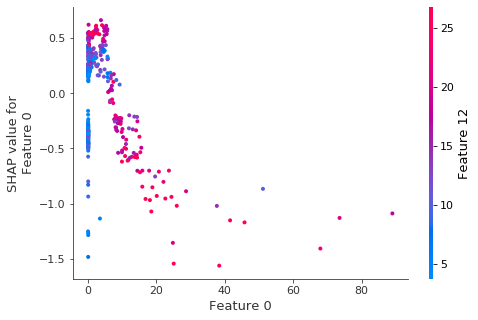

In [4]:
explainer = ngb.get_shap_tree_explainer(param_idx=0)
shap_values = explainer.shap_values(X)
shap.dependence_plot(0, shap_values, X)

### interventional method

 97%|=================== | 493/506 [00:15<00:00]       

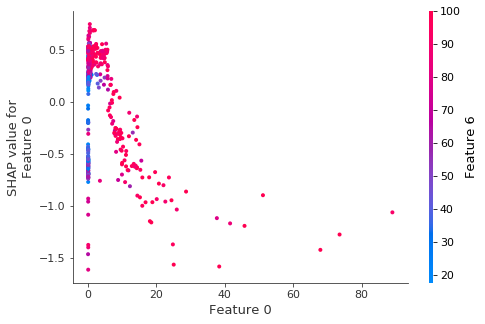

In [5]:
explainer = ngb.get_shap_tree_explainer(param_idx=0, data = X, feature_perturbation="interventional")
shap_values = explainer.shap_values(X, check_additivity=False)
shap.dependence_plot(0, shap_values, X)

## SHAP plot for scale trees

### tree_path_dependent method

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


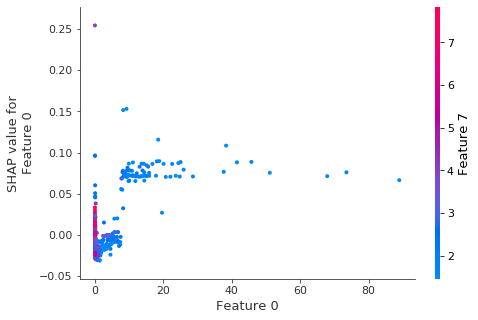

In [6]:
explainer = ngb.get_shap_tree_explainer(param_idx=1)
shap_values = explainer.shap_values(X)
shap.dependence_plot(0, shap_values, X)

### interventional method

 96%|=================== | 485/506 [00:14<00:00]       

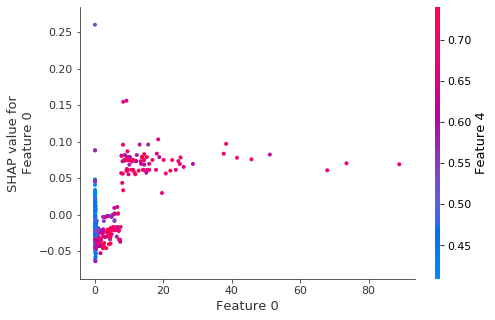

In [7]:
explainer = ngb.get_shap_tree_explainer(param_idx=1, data = X, feature_perturbation="interventional")
shap_values = explainer.shap_values(X, check_additivity=False)
shap.dependence_plot(0, shap_values, X)

## Notice: if you are trying to directly use shap package to create TreeExplainer, it will throw and error and tell you to use NGBoost.get_shap_tree_explainer method

In [8]:
shap.TreeExplainer(ngb)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


AssertionError: Please create TreeExplainer from NGBoost.get_shap_tree_explainer method!